In [ ]:
!pip install 'lightning-flash[image]==0.7.4'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import flash
print(flash.__version__)

0.7.4


In [ ]:
import torch
import flash
from flash.core.data.utils import download_data
from flash.image import ImageClassificationData, ImageClassifier
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1C6wK7bPrrQ29eWbJ1KI6r_ssYGMahIoM/view?usp=sharing
!unzip /content/Bencana.zip

Downloading...
From: https://drive.google.com/uc?id=1C6wK7bPrrQ29eWbJ1KI6r_ssYGMahIoM
To: /content/Bencana.zip
100% 14.0M/14.0M [00:00<00:00, 53.1MB/s]
Archive:  /content/Bencana.zip
  inflating: Bencana/Test/Volcano/doa-gunung-meletus.jpeg  
  inflating: Bencana/Test/Volcano/images (5).jpeg  
  inflating: Bencana/Test/Volcano/Gunung-Merapi-Mongabay.co_.id_.jpg  
  inflating: Bencana/Test/Volcano/puncak-gunung-merapi-di-foto-dari-desa-balerante-kecamatan-kemalang-klaten-selasa-2872020_169.jpeg  
  inflating: Bencana/Test/Volcano/tiga-gunung-meletus-masyarakat-diimbau-tidak-panik-BSjVM1Aqgq.jpeg  
  inflating: Bencana/Test/Volcano/Untitled-design-32-1.jpeg  
  inflating: Bencana/Test/Volcano/1764258865.jpeg  
  inflating: Bencana/Test/Fire/images (23).jpg  
  inflating: Bencana/Test/Volcano/1038210078.jpeg  
  inflating: Bencana/Test/Volcano/images (3).jpeg  
  inflating: Bencana/Test/Volcano/images (4).jpeg  
  inflating: Bencana/Test/Fire/images (19).jpg  
  inflating: Bencana/Test/Fi

In [ ]:
datamodule = ImageClassificationData.from_folders(
    train_folder="/content/Bencana/Train",
    val_folder="/content/Bencana/Test/",
    batch_size=5,
    transform_kwargs={"image_size": (196, 196), "mean": (0.485, 0.456, 0.406), "std": (0.229, 0.224, 0.225)},
)

# 2. Build the task
model = ImageClassifier(backbone="resnet18", labels=datamodule.labels)

# 3. Create the trainer and finetune the model
trainer = flash.Trainer(max_epochs=3, gpus=torch.cuda.device_count())
trainer.finetune(model, datamodule=datamodule, strategy="freeze")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type           | Params
-------------------------------------------------
0 | train_metrics | ModuleDict     | 0     
1 | val_metrics   | ModuleDict     | 0     
2 | test_me

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
from PIL import Image

# 4. Predict
datamodule = ImageClassificationData.from_files(
    predict_files=[
        "Bencana/Test/Flood/banjir80.jpg",
        "Bencana/Test/Volcano/images (5).jpeg",
        "Bencana/Test/Wind/9d011084-229c-445f-8af1-b68b16901797.jpeg",
    ],
    batch_size=1,
)
predictions = trainer.predict(model, datamodule=datamodule, output="labels")
print(predictions)

# 5. Save the model!
trainer.save_checkpoint("image_classification_model.pt")

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 85it [00:00, ?it/s]

[['Flood'], ['Volcano'], ['Wind']]


In [ ]:
predict_files=[
        "Bencana/Test/Flood/banjir80.jpg",
        "Bencana/Test/Volcano/images (5).jpeg",
        "Bencana/Test/Wind/9d011084-229c-445f-8af1-b68b16901797.jpeg",]

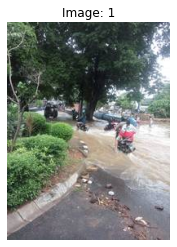

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 85it [00:00, ?it/s]

Prediksi Jenis Bencana:  ['Flood']


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 85it [00:00, ?it/s]

Earthquake: 0.017842283472418785
Fire: 0.002273865044116974
Flood: 0.8112917542457581
Haze: 0.006703636609017849
Volcano: 0.009054778143763542
Wind: 0.1528337150812149


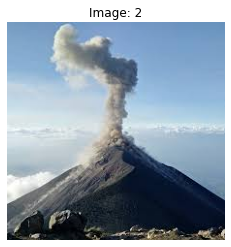

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 85it [00:00, ?it/s]

Prediksi Jenis Bencana:  ['Volcano']


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 85it [00:00, ?it/s]

Earthquake: 0.0018783542327582836
Fire: 4.7270073991967365e-05
Flood: 0.00016175577184185386
Haze: 0.0003296310896985233
Volcano: 0.9972673654556274
Wind: 0.0003156477177981287


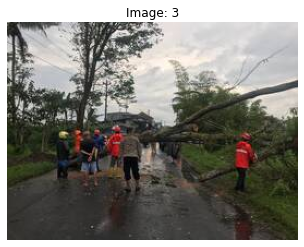

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 85it [00:00, ?it/s]

Prediksi Jenis Bencana:  ['Wind']


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 85it [00:00, ?it/s]

Earthquake: 0.005037532653659582
Fire: 0.007250665221363306
Flood: 0.09566275030374527
Haze: 0.026089273393154144
Volcano: 0.014937137253582478
Wind: 0.8510226607322693


In [ ]:
#Predict
for i in range(len(predict_files)):
  image_test = imread(predict_files[i])
  plt.imshow(image_test)
  plt.title(f"Image: {i+1}")
  plt.axis("off")
  plt.show()

  datamodule = ImageClassificationData.from_files(predict_files=[
        "Bencana/Test/Flood/banjir80.jpg",
        "Bencana/Test/Volcano/images (5).jpeg",
        "Bencana/Test/Wind/9d011084-229c-445f-8af1-b68b16901797.jpeg",]
        ,batch_size=1,)
  predictions = trainer.predict(model, datamodule=datamodule, output="labels")
  print("Prediksi Jenis Bencana: ", predictions[i])

  predictions2 = trainer.predict(model, datamodule=datamodule, output="probabilities")
  print("Earthquake: {}\nFire: {}\nFlood: {}\nHaze: {}\nVolcano: {}\nWind: {}".format(predictions2[i][0][0], predictions2[i][0][1], predictions2[i][0][2], predictions2[i][0][3], predictions2[i][0][4], predictions2[i][0][5]))

f1 Score: 1.0
Recall: 1.0
Precision: 1.0


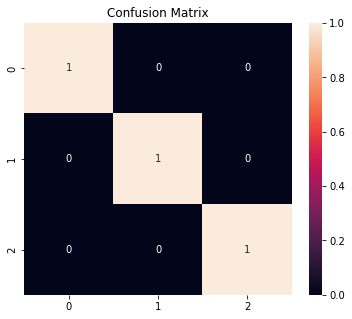

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
y_pred = ["flood","volcano","wind"]
y_true = ["flood","volcano","wind"]

plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred),annot = True)
plt.title("Confusion Matrix")

print("f1 Score: {}\nRecall: {}\nPrecision: {}".format(f1_score(y_true, y_pred, average='micro'), recall_score(y_true, y_pred,average='micro'), (precision_score(y_true, y_pred,average='micro'))))